In [8]:
# samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
# from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=1)
# neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

In [5]:
# print(neigh.kneighbors([[., 1., 1.]]))

(array([[0.5]]), array([[2]]))


In [6]:
# print(neigh.kneighbors([[0., 0., 0.]]))

(array([[0.]]), array([[0]]))


In [ ]:
# samples = [....will be 1600 vectors with first 900 from ceeinject and second 900 from renos.....]
# features = [....will be 1600 chars with first 900 are 'C' and second 900 are 'R'.....]

In [69]:
import numpy as np 
import re
# Note: dont change dbscan.txt locally
samples = []
ceeinject = open("CeeInject_w2v.txt", "rt")
index = 0
for line in ceeinject:
    if index == 800:
        break

    strs = line[1:len(line)-2]
    nums = strs.split(",")
    for i in range(0, len(nums)): 
        nums[i] = float(nums[i]) 
    samples.append(nums)
    index += 1
    
ceeinject.close()
print(len(samples))


renos = open("Renos_w2v.txt", "rt")
index2 = 0
for line in renos:
    if index2 == 800:
        break

    strs = line[1:len(line)-2]
    nums = strs.split(",")
    for i in range(0, len(nums)): 
        nums[i] = float(nums[i]) 
    samples.append(nums)
    index2 += 1
    
fin.close()
print(len(samples))


800
1600


In [71]:
ceeinject = open("CeeInject_w2v.txt", "rt")
index = 0
for line in ceeinject:
    if index >= 800:
        strs = line[1:len(line)-2]
        nums = strs.split(",")
        for i in range(0, len(nums)): 
            nums[i] = float(nums[i]) 
        samples.append(nums)
    index += 1
    
ceeinject.close()
print(len(samples))


renos = open("Renos_w2v.txt", "rt")
index2 = 0
for line in renos:
    if index2 >= 800:
        strs = line[1:len(line)-2]
        nums = strs.split(",")
        for i in range(0, len(nums)): 
            nums[i] = float(nums[i]) 
        samples.append(nums)
    index2 += 1
    
fin.close()
print(len(samples)) # now sample has first 800 as CeeInject second 800 as Renos, third 100 as Ceeinject and fourth 100 as Renos



1700
1800


In [139]:
# fill in features array
features = []
for i in range(800):
    features.append(0) # 0 means C
for i in range(800):
    features.append(1) # 1 means R
print(len(features))

for i in range(900):
    if i >= 800:
        features.append(0)
for i in range(900):
    if(i >= 800):
        features.append(1)
print(len(features))

1600
1800


In [140]:
samples = np.array(samples)
features = np.array(features)


# samples and features are ready to get trained 

In [277]:
print(features[788:810]) # see some of the features data
print(features[1590:1610]) # see some of the features data
print(features[1690:1710]) # see some of the features data

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [166]:
# y = []
# for i in range(800):
#     y.append('C') # 0 means C
# for i in range(800):
#     y.append('R') # 1 means R
# print(len(features))

# for i in range(900):
#     if i >= 800:
#         y.append('C')
# for i in range(900):
#     if(i >= 800):
#         y.append('R')
# print(len(y))

1800
1800


In [316]:
# def KNN(samples, y,neighbors):
#     # Import train_test_split function
#     from sklearn.model_selection import train_test_split
#     print(type(samples))
#     print(type(y))
#     # Split dataset into training set and test set
#     X_train, X_test, y_train, y_test = train_test_split(samples, y, test_size=0.11) # 1600/1800% training and 200/1800% test
    
#     from sklearn.neighbors import KNeighborsClassifier
#     #Create KNN Classifier
#     knn = KNeighborsClassifier(n_neighbors=neighbors)

#     #Train the model using the training sets
#     knn.fit(X_train, y_train)

#     #Predict the response for test dataset
#     y_pred = knn.predict(X_test)
    
#     print(y_pred)
#     print(type(y_pred))
#     #Import scikit-learn metrics module for accuracy calculation
#     from sklearn import metrics
#     from sklearn.metrics import roc_curve
#     from sklearn.metrics import auc
#     import matplotlib.pyplot as plt
#     # Model Accuracy, how often is the classifier correct?
#     print("Accuracy with {} neighbors:".format(neighbors),metrics.accuracy_score(y_test, y_pred))
#     for i in range(len(y_pred)):
#         if y_pred[i] == 'C':
#             y_pred[i] = 0
#         else:
#             y_pred[i] = 1
            
#     fpr, tpr, threshold = roc_curve(y_test, y_pred[:0])
#     roc_auc = auc(fpr, tpr)

#     plt.title('CeeInject VS Renos')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.title('ROC Curve of kNN')
#     plt.show()

In [317]:
KNN(samples, y, 6)

<class 'numpy.ndarray'>
<class 'list'>
['C' 'R' 'C' 'R' 'R' 'C' 'C' 'C' 'R' 'C' 'C' 'R' 'R' 'C' 'C' 'C' 'C' 'R'
 'C' 'C' 'R' 'R' 'C' 'C' 'C' 'C' 'R' 'R' 'R' 'C' 'R' 'R' 'C' 'R' 'R' 'R'
 'C' 'R' 'C' 'R' 'C' 'C' 'C' 'R' 'R' 'R' 'C' 'R' 'C' 'C' 'C' 'R' 'C' 'R'
 'C' 'C' 'R' 'R' 'C' 'C' 'R' 'R' 'R' 'R' 'R' 'R' 'C' 'R' 'C' 'C' 'R' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'R' 'R' 'C' 'C' 'C' 'R' 'C' 'R' 'C' 'R' 'C' 'C'
 'C' 'R' 'C' 'C' 'C' 'C' 'C' 'C' 'R' 'C' 'R' 'C' 'R' 'R' 'C' 'R' 'C' 'C'
 'R' 'C' 'C' 'C' 'R' 'C' 'C' 'R' 'C' 'R' 'C' 'R' 'R' 'C' 'R' 'C' 'C' 'C'
 'C' 'C' 'R' 'R' 'C' 'C' 'C' 'R' 'R' 'C' 'R' 'R' 'R' 'R' 'R' 'C' 'R' 'C'
 'C' 'C' 'C' 'R' 'C' 'R' 'R' 'C' 'C' 'C' 'R' 'R' 'C' 'R' 'C' 'R' 'C' 'C'
 'C' 'R' 'R' 'C' 'R' 'C' 'C' 'C' 'R' 'C' 'C' 'R' 'R' 'R' 'C' 'C' 'C' 'C'
 'R' 'C' 'C' 'C' 'R' 'C' 'R' 'C' 'R' 'C' 'C' 'C' 'R' 'C' 'R' 'C' 'C' 'C']
<class 'numpy.ndarray'>
Accuracy with 6 neighbors: 0.9292929292929293


Model score:  0.96
Test set length:  200


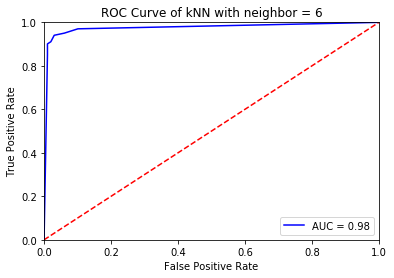

In [318]:
# def KNN(samples, features,neighbors):
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#     X_train is the training data set.
#     y_train is the set of labels to all the data in X_train.
#     X_test is the test data set.
#     y_test is the set of labels to all the data in X_test.
neighbors = 6
X_train, X_test, y_train, y_test = train_test_split(samples, features, test_size=0.111) # 1600/1800% training and 200/1800% test
knn = KNeighborsClassifier(n_neighbors = neighbors)
knn.fit(X_train,y_train)
print("Model score: ", knn.score(X_train, y_train))
y_scores = knn.predict_proba(X_test) # look at the probabilities the model assigned to each class:

print("Test set length: ", len(y_scores))

# print("Accuracy with {} neighbors:".format(neighbors),metrics.accuracy_score(y_test, y_scores))

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1]) # only select the probability estimates of the positive class
roc_auc = auc(fpr, tpr)

plt.title('CeeInject vs Renos')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN with neighbor = {}'.format(neighbors))
plt.show()


In [319]:
# read data into list to predict using trained model above
challenge = open("Challenge_w2v.txt", "rt")
i = 0
challenge_data = []
for line in challenge: 
    strs = line[1:len(line)-2]
    nums = strs.split(",")
    for i in range(0, len(nums)): 
        nums[i] = float(nums[i]) 
    challenge_data.append(nums)
    i += 1
challenge_data = np.array(challenge_data)
challenge.close()
print(len(challenge_data))

200


In [320]:
probs_challenge = knn.predict(challenge_data) # use trained model to predict data from challenge

In [321]:
print(probs_challenge) # see classified results

[1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0]


In [322]:
# next write classified results into solution.txt
classifications_challenge = []
for ele in probs_challenge: # remember 0 means C and 1 means R.
    if(ele == 0):
        classifications_challenge.append('C')
    else:
        classifications_challenge.append('R')


import os
import glob
txtfiles = []
total_size = 0
prediction = open( "solution.txt", "w+" )
i = 0
for file in sorted(glob.glob("Challenge/*.txt")):
    prediction.write(file[10: len(file)-4] + "," + classifications_challenge[i] + "\n")
    i += 1
    

In [323]:
# confirm the length of the solution.txt file
fname = 'solution.txt'
def file_len(fname):
    with open(fname) as f:
        for j, l in enumerate(f):
            pass
        return j + 1  
print("lines in solution.txt:" , file_len(fname))

lines in solution.txt: 200
